In [87]:
import pandas as pd
import numpy as np
import seaborn as sns

In [88]:
df = pd.read_excel("../../data/interim/cleaned_v2.xlsx")
df.head()

,match_id,big_age,big_occupation,big_gender,program,program_type,big_race_ethnicity,rationale_for_match,little_gender,little_participant__race_ethnicity,...,big_birthdate,match_activation_date,little_birthdate,avg_cadence_day,early_stage_notes,late_stage_notes,early_stage_score,late_stage_score,sentiment_change,sentiment_trend
0,a1v2J0000027CWYQA2,25,Student: High School,Female,YIP 2016,Site,Asian;,"Big, little and parent were in agreement with ...",Female,Asian,...,1999-10-01,2017-03-16,2005-10-01,35.000000,Question: Activities: Answer: BS ass...,Question: Activities: Answer: When a...,0.7650,0.9905,0.2255,Stable
1,a1v2J0000027CWfQAM,26,Student: College,Female,YIP 2016,Site,White or Caucasian;,"Both seem to like the arts, books, and present...",Female,Black or African American,...,1998-06-01,2017-01-23,2006-08-01,46.200000,Question: Activities: Answer: Sami a...,Question: Activities: Answer: L_firs...,0.9987,0.9913,-0.0074,Stable
2,a1v2J0000027CWiQAM,27,Student: High School,Female,YIP 2016,Site,Asian;,Both BS and LB share similar interests. BS has...,Female,Asian,...,1998-02-01,2017-02-01,2005-10-01,35.333333,Question: Activities: Answer: BS has...,Question: Activities: Answer: BS sai...,0.9612,0.9893,0.0281,Stable
3,a1v2J0000027CWoQAM,25,Student: High School,Female,YIP 2016,Site,Asian;,B_first_name was open to the little that he is...,Female,Asian,...,1999-11-01,2017-03-16,2009-04-01,43.750000,Question: Activities: Answer: BS pla...,Question: Activities: Answer: This m...,0.9972,0.4696,-0.5276,Declined
4,a1v2J0000027CWpQAM,27,Student: College,Male,YIP 2016,Site,White or Caucasian;,Distance is 8 miles (21 mins). Both are talkti...,Male,Black or African American,...,1997-09-01,2017-01-26,2006-11-01,45.750000,Question: Activities: Answer: B_firs...,Question: Activities: Answer: B_firs...,0.9995,0.9825,-0.0170,Stable


In [89]:
df['big_occupation'].unique()

array(['Student: High School', 'Student: College',
       'Human Services: Social Worker', 'Retired',
       'Medical: Healthcare Worker', 'Business', 'Medical',
       'Education: Admin', 'Unknown', 'Business: Sales', 'Finance',
       'Business: Mgt, Admin', 'Law', 'Education', 'Law: Police Officer',
       'Business: Engineer', 'Business: Marketing', 'Unemployed',
       'Medical: Nurse', 'Military', 'Consultant', 'Finance: Accountant',
       'Tech: Support, Writing', 'Barber/Hairstylist', 'Govt',
       'Education: College Professor', 'Human Services: Youth Worker',
       'Human Services: Non-Profit', 'Govt: Mgmt/Admin',
       'Real Estate: Realtor', 'Business: Clerical', 'Tech: Engineer',
       'Arts, Entertainment, Sports', 'Medical: Admin', 'Construction',
       'Education: Teacher', 'Customer Service',
       'Business: Human Resources', 'Tech: Production Line',
       'Self-Employed, Entrepreneur', 'Law: Lawyer',
       'Service: Restaurant', 'Education: Teacher Asst/Aid'

In [90]:
# Mapping occupation categories from the provided list into a busyness scale (1-5)
busyness_mapping = {
    # 1: Very Low Busyness (Retired, Unemployed, Fully Flexible)
    "Retired": 1, "Homemaker": 1, "Unemployed": 1, "Disabled": 1,

    # 2: Low Busyness (Flexible, Light Workload)
    "Self-Employed, Entrepreneur": 2, "Barber/Hairstylist": 2, "Clergy": 2, 
    "Librarian": 2, "Personal Trainer/Coach": 2, "Child/Day Care Worker": 2,
    "Agriculture": 2, "Forestry": 2, "Facilities/Maintenance": 2,

    # 3: Moderate Busyness (Structured, Somewhat Demanding)
    "Education: Teacher": 3, "Education: Teacher Asst/Aid": 3, "Medical: Nurse": 3, 
    "Customer Service": 3, "Human Services: Social Worker": 3, "Human Services: Non-Profit": 3,
    "Factory Worker": 3, "Retail: Sales": 3, "Retail: Mgt": 3, "Insurance": 3, "Govt: Clerical": 3,
    "Laborer": 3, "Service: Restaurant": 3, "Service: Hotel": 3, "Law: Security Officer": 3, 
    "Landscaper/Groundskeeper": 3, "Firefighter": 3, "Transport: Driver": 3, "Transport: Mechanic": 3,
    "Journalist/Media": 3, "Architect": 3, "Tech: Support, Writing": 3,

    # 4: Busy (High Responsibility, Less Flexibility)
    "Tech: Engineer": 4, "Finance: Accountant": 4, "Business: Marketing": 4, "Consultant": 4,
    "Transport: Pilot": 4, "Law: Police Officer": 4, "Business: Human Resources": 4, 
    "Finance: Banking": 4, "Finance: Auditor": 4, "Tech: Computer/Programmer": 4, 
    "Medical: Doctor, Provider": 4, "Scientist": 4, "Tech: Research/Design": 4,
    "Law: Paralegal": 4, "Govt: Technician": 4, "Transport: Flight Attendant": 4,
    "Medical: Pharmacist": 4, "Education: Admin": 4, "Tech: Production Line": 4,

    # 5: Very Busy (Executives, Lawyers, Senior Management)
    "Business: Mgt, Admin": 5, "Law: Lawyer": 5, "Law: Judge": 5, "Govt: Mgmt/Admin": 5,
    "Finance: Economist": 5, "Tech: Management": 5, "Education: College Professor": 5,
    "Investment Banker": 5, "Real Estate: Realtor": 5
}

# Function to assign busyness score
def get_busyness(occupation):
    return busyness_mapping.get(occupation, 3)  # Default to 3 if not found (moderate busyness)


In [91]:
df["busyness_level"] = df["big_occupation"].apply(get_busyness)
df['busyness_level'].value_counts()

busyness_level
3    2111
4     716
5     273
2      86
1      78
Name: count, dtype: int64

<Axes: xlabel='busyness_level', ylabel='match_length'>

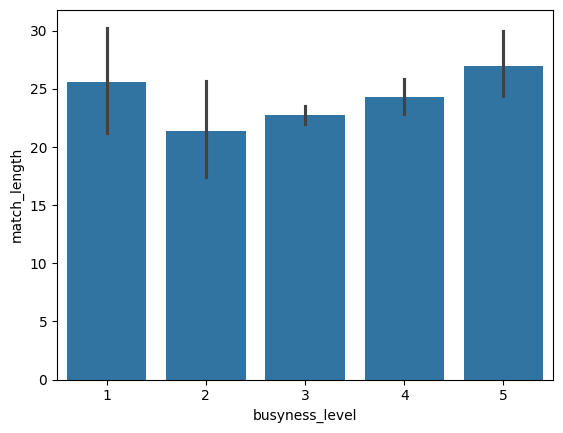

In [92]:
sns.barplot(x=df['busyness_level'], y=df['match_length'])

In [93]:
# some features engineering
df["big_age_match_start"] = abs(df['big_birthdate'].dt.year - df["match_activation_date"].dt.year)
df["little_age_match_start"] = abs(df['little_birthdate'].dt.year - df["match_activation_date"].dt.year)
df["same_gender"] = df['little_gender']==df['big_gender']



In [94]:
df.columns

Index(['match_id', 'big_age', 'big_occupation', 'big_gender', 'program',
       'program_type', 'big_race_ethnicity', 'rationale_for_match',
       'little_gender', 'little_participant__race_ethnicity', 'match_length',
       'big_birthdate', 'match_activation_date', 'little_birthdate',
       'avg_cadence_day', 'early_stage_notes', 'late_stage_notes',
       'early_stage_score', 'late_stage_score', 'sentiment_change',
       'sentiment_trend', 'busyness_level', 'big_age_match_start',
       'little_age_match_start', 'same_gender'],
      dtype='object')

In [95]:
df.drop([
    "big_occupation", "big_gender", "little_gender", "big_birthdate",
    "match_activation_date", "little_birthdate", "late_stage_notes", "early_stage_notes",
    "program", 
], axis=1, inplace=True)

In [96]:
df.head()

,match_id,big_age,program_type,big_race_ethnicity,rationale_for_match,little_participant__race_ethnicity,match_length,avg_cadence_day,early_stage_score,late_stage_score,sentiment_change,sentiment_trend,busyness_level,big_age_match_start,little_age_match_start,same_gender
0,a1v2J0000027CWYQA2,25,Site,Asian;,"Big, little and parent were in agreement with ...",Asian,5.5,35.000000,0.7650,0.9905,0.2255,Stable,3,18,12,True
1,a1v2J0000027CWfQAM,26,Site,White or Caucasian;,"Both seem to like the arts, books, and present...",Black or African American,8.5,46.200000,0.9987,0.9913,-0.0074,Stable,3,19,11,True
2,a1v2J0000027CWiQAM,27,Site,Asian;,Both BS and LB share similar interests. BS has...,Asian,6.9,35.333333,0.9612,0.9893,0.0281,Stable,3,19,12,True
3,a1v2J0000027CWoQAM,25,Site,Asian;,B_first_name was open to the little that he is...,Asian,7.2,43.750000,0.9972,0.4696,-0.5276,Declined,3,18,8,True
4,a1v2J0000027CWpQAM,27,Site,White or Caucasian;,Distance is 8 miles (21 mins). Both are talkti...,Black or African American,7.4,45.750000,0.9995,0.9825,-0.0170,Stable,3,20,11,True


In [97]:
df['program_type'].unique()

array(['Site', 'Community', 'Site Based Facilitated', 'Site Based Plus'],
      dtype=object)

In [98]:
df['rationale_for_match'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Big, little and parent were in agreement with ...
1       Both seem to like the arts, books, and present...
2       Both BS and LB share similar interests. BS has...
3       B_first_name was open to the little that he is...
4       Distance is 8 miles (21 mins). Both are talkti...
                              ...                        
3259    Distance: 13 min (4.6 mi) Shared Interests: sp...
3260    1. Distance: 10 miles (20 mins) 2. Shared Trai...
3261    1. Distance: 9 miles (20 mins) 2. Shared Trait...
3262    Distance: 9 min (3.7 mi) Shared interests:Spor...
3263    They were matched for several reasons. BS has ...
Name: rationale_for_match, Length: 3264, dtype: object>

In [99]:
df.dtypes

match_id                               object
big_age                                 int64
program_type                           object
big_race_ethnicity                     object
rationale_for_match                    object
little_participant__race_ethnicity     object
match_length                          float64
avg_cadence_day                       float64
early_stage_score                     float64
late_stage_score                      float64
sentiment_change                      float64
sentiment_trend                        object
busyness_level                          int64
big_age_match_start                     int32
little_age_match_start                  int32
same_gender                              bool
dtype: object

In [100]:
# Tokenize and compute Jaccard Similarity (intersection / union)
def jaccard_similarity(str1, str2):
    set1 = set(str(str1).lower().split(' '))
    set2 = set(str(str2).lower().split(' '))
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

df['race_similarity'] = df.apply(lambda row: jaccard_similarity(row['big_race_ethnicity'], row['little_participant__race_ethnicity']), axis=1)


In [101]:
df.columns

Index(['match_id', 'big_age', 'program_type', 'big_race_ethnicity',
       'rationale_for_match', 'little_participant__race_ethnicity',
       'match_length', 'avg_cadence_day', 'early_stage_score',
       'late_stage_score', 'sentiment_change', 'sentiment_trend',
       'busyness_level', 'big_age_match_start', 'little_age_match_start',
       'same_gender', 'race_similarity'],
      dtype='object')

In [102]:
df.drop(['rationale_for_match', "little_participant__race_ethnicity", "big_race_ethnicity"], axis=1, inplace=True)

In [103]:
df.dtypes

match_id                   object
big_age                     int64
program_type               object
match_length              float64
avg_cadence_day           float64
early_stage_score         float64
late_stage_score          float64
sentiment_change          float64
sentiment_trend            object
busyness_level              int64
big_age_match_start         int32
little_age_match_start      int32
same_gender                  bool
race_similarity           float64
dtype: object

In [104]:
df.to_excel("../../data/interim/modeling.xlsx", index=False)